In [5]:
# Projeto COVID-19

#Digital Innovation One

In [6]:
#Importação de bibliotecas necessárias

import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

In [7]:
# Importar dados para o projeto

url = 'https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true'

df = pd.read_csv(url, parse_dates=['ObservationDate', 'Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [8]:
# Conferir os tipos de cada coluna

df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [9]:
import re

def corrige_colunas (col_name):
    return re.sub(r"[/| ]", "", col_name).lower()

In [10]:
# Teste da função
corrige_colunas("AdgeE/P ou")

'adgeepou'

In [11]:
# Corrigindo as colunas do df

df.columns = [corrige_colunas(col) for col in df.columns]

In [12]:
df

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [13]:
### Trabalhando com os dados do Brasil

df.countryregion.value_counts()
df.countryregion.unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [14]:
# Criando um subset para esses dados

df.loc[df.countryregion == 'Brazil']

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
82,83,2020-01-23,NaN,Brazil,2020-01-23 17:00:00,0.0,0.0,0.0
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [15]:
brazil = df.loc[
    (df.countryregion == 'Brazil') &
    (df.confirmed > 0)
]

In [16]:
brazil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


In [17]:
# Investigação dos casos confirmados

## Gráfico de evolução de casos confirmados no Brasil

px.line(brazil, 'observationdate', 'confirmed', title = 'Casos confirmados no Brasil')

In [18]:
# Calculando quantidade de novos casos por dia

## Técnica de programação funcional
brazil['newcases'] = list(map(
    lambda x: 0 if x == 0 else brazil['confirmed'].iloc[x] - brazil['confirmed'].iloc[x-1],
    np.arange(brazil.shape[0])
))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
brazil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered,newcases
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,1.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0,17126.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0,13220.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0,7569.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0,14288.0


In [20]:
# Visualizando o gráfico novo

px.line(brazil, x='observationdate', y='newcases', title='Novos casos por dia')

In [21]:
# Calculando por casos de óbitos

fig = go.Figure()

fig.add_trace(
        go.Scatter(x=brazil.observationdate, y=brazil.deaths, name='Mortes',
                   mode='lines+markers', line={'color':'red'})
)
    
# Editando o layout

fig.update_layout(title='Mortes por COVID-19 no Brasil',
                  xaxis_title='Data',
                  yaxis_title='Número de mortes')
fig.show()


In [22]:
# Taxa de crescimento 

def taxa_crescimento(data, variable, date_init=None, date_end=None):
    # se date_init for None, define como a primeira data disponível
    if date_init == None:
        date_init = data.observationdate.loc[data[variable] > 0].min()
    else:
        date_init = pd.to_datetime(date_init)
        
    
    if date_end == None:
        date_end = data.observationdate.iloc[-1]
    else:
        date_end = pd.to_datetime(date_end)
        
    # define os valores do presente e passado
    passado = data.loc[data.observationdate == date_init, variable].values[0]
    presente = data.loc[data.observationdate == date_end, variable].values[0]
    
    # definir o número de pontos no tempo que vamos avaliar
    n = (date_end - date_init).days
    
    # calculo da taxa 
    taxa = (presente/passado)**(1/n) - 1
    return taxa*100
    

In [23]:
# taxa de crescimento médio do COVID-19 no Brasil em todo o período

taxa_crescimento(brazil, 'confirmed')

16.27183353112116

In [24]:
def taxa_crescimento_diaria(data, variable, date_init=None):
    # se a data for None, define como a primeira data disponivel
    if date_init == None:
        date_init = data.observationdate.loc[data[variable] > 0].min()
    else:
        date_init = pd.to_datetime(date_init)
        
    date_end = data.observationdate.max()
    # define o número de pontos no tempo para avaliação
    n = (date_end - date_init).days
    
    # taxa de calculo de aumento de casos de um dia para o outro
    taxas = list(map(
        lambda x: (data[variable].iloc[x] - data[variable].iloc[x-1])/data[variable].iloc[x-1],
        range(1, n+1)
    ))
    return np.array(taxas) * 100

In [25]:
tx_dia = taxa_crescimento_diaria(brazil, 'confirmed')

In [26]:
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [27]:
primeiro_dia = brazil.observationdate.loc[brazil.confirmed > 0].min()

px.line(x=pd.date_range(primeiro_dia, brazil.observationdate.max())[1:],
        y=tx_dia, title='Taxa de crescimento de casos confirmados no Brasil',
        labels={'y':'Taxa de crescimento', 'x':'Data'})

In [28]:
# Predições

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [29]:
confirmed = brazil.confirmed
confirmed.index = brazil.observationdate
confirmed

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [30]:
res = seasonal_decompose(confirmed)

In [31]:
newcases = brazil.newcases
newcases.index = brazil.observationdate

res = seasonal_decompose(newcases)


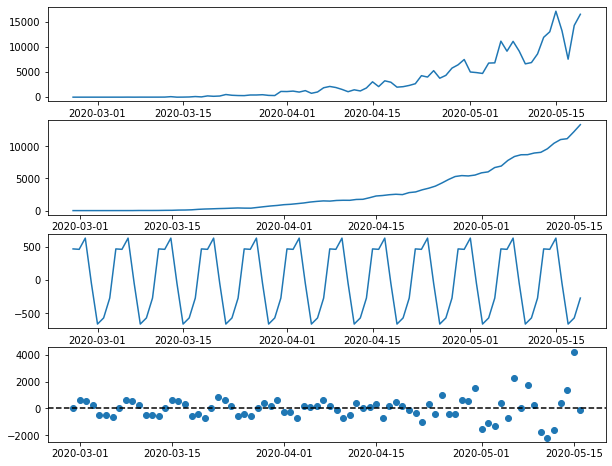

In [32]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.scatter(newcases.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()


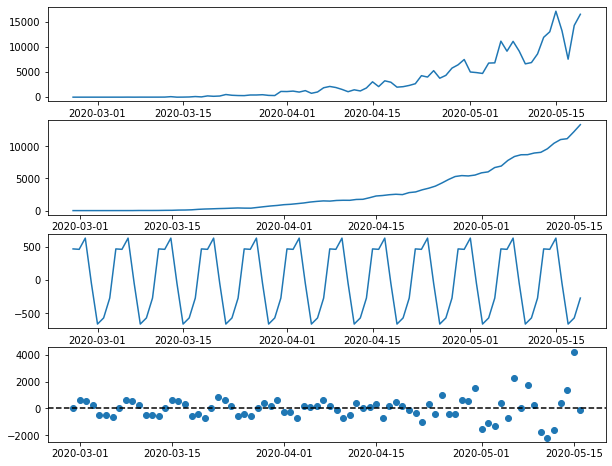

In [33]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10,8))
ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.scatter(newcases.index, res.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()



In [34]:
# Modelagem ARIMA

!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from pmdarima.arima import auto_arima

In [37]:
model = auto_arima(confirmed)

In [39]:
fig = go.Figure(go.Scatter(
    x=confirmed.index, y=confirmed, name='Observados'
))

fig.add_trace(go.Scatter(x=confirmed.index, y=model.predict_in_sample(), name='Preditos'))

fig.add_trace(go.Scatter(x=pd.date_range('2020-05-20', '2020-06-20'), y=model.predict(31), name='Forecast'))

fig.update_layout(title='Previsão de casos confirmados no Brasil para os próximos 30 dias')
fig.show()


In [44]:
# Modelo de crescimento

## Vamos usar a biblioteca fbprophet

!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 107 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638828 sha256=fd204b036746e3e96c8809daea0c04385e90ece26e7514998538286d755420e4
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [45]:
from fbprophet import Prophet

In [53]:
# Pré-processamentos

train = confirmed.reset_index()[:-5]
test = confirmed.reset_index()[-5:]

# Renomeando colunas

train.rename(columns={'observationdate': 'ds', 'confirmed': 'y'}, inplace=True)
test.rename(columns={'observationdate': 'ds', 'confirmed': 'y'}, inplace=True)

# Definir o modelo de crescimento

prophet = Prophet(growth='logistic', changepoints=['2020-03-21', '2020-03-30', '2020-04-25', '2020-05-03', '2020-05-10'])

#pop = 211463256 ## número da população brasileira
pop = 1000000
train['cap'] = pop

# Treinando o modelo

prophet.fit(train)

# Construir previsões para o futuro
future_dates= prophet.make_future_dataframe(periods=200)
future_dates['cap'] = pop
forecast = prophet.predict(future_dates)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [54]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.ds, y=forecast.yhat, name='Predição'))
fig.add_trace(go.Scatter(x=train.ds, y=train.y, name='Observados - Treino'))
fig.update_layout(title='Predições de casos confirmados no Brasil')
fig.show()